First we try to understand which is the best SVM classifier among Linear, 2nd degree polynomial, radial basis function and their angularized versions, each of which tested with the following set of Cs: 0.3, 0.7, 1.0, 25.0, 50.0, 75.0, 100.0. 

In [1]:
import numpy as np
from svm_classifier import svm, svm_angular, svm_with_different_Cs, angular_svm_with_different_Cs
from knn_classifier import k_nn
from time import time
import pandas as pd
from ctypes import *
import sys
from math import sqrt as sqrt
from numpy.ctypeslib import ndpointer 

lib = cdll.LoadLibrary("./lib_naive_.so")


class cross_validation_result(Structure):
    _fields_ = [    ("avg_accuracy", c_float),
                    ("min_accuracy", c_float),
                    ("max_accuracy", c_float),
                    ("accuracy_variance", c_float) ]
    def __init__(self):
        self.avg_accuracy = self.accuracy_variance = 0;
        self.min_accuracy = sys.float_info.max;
        self.max_accuracy = sys.float_info.min;
    
    def print_scores(self):
        print( "==========================================================" + "\n" 
                + "Naive bayes classification: " + "\n" 
                + "Minimum Accuracy: " + str(self.min_accuracy) + "\n"
                + "Average Accuracy: " + str(self.avg_accuracy) + "\n"
                + "Maximum Accuracy: " + str(self.max_accuracy) + "\n"
                + "Variance of Accuracy: " + str(self.accuracy_variance) + "\n"
                + "Standard Deviation of Accuracy: " + str(sqrt(self.accuracy_variance)) + "\n" 
                + "=========================================================="
        )



# Load spambase dataset
file_name = "spambase.data"
data = open(file_name, "r")
mailData = np.loadtxt(data, delimiter=",")
np.random.shuffle(mailData)


# MAIN:



# py_main = lib.py_main 
# py_main.argtypes = [(c_float * mailData.shape[0]) * mailData.shape[1]] 

# c_mail_data = np.array(mailData, dtype=np.float32)
# lib.py_main.restype = cross_validation_result
# start = time()
# naive_bayes_score = lib.py_main()
# end = time()
# naive_bayes_time = end - start


lib.py_main.restype = cross_validation_result
start = time()
naive_bayes_score = lib.py_main()
end = time()
naive_bayes_time = end - start


# naive_bayes_score.print_scores()

start = time()
# linear_score, poly_score, rbf_score = svm(mailData)
svm_scores = svm_with_different_Cs(mailData)
end = time()
svm_time = end - start
# print("\nTime elapsed for SVM: {}".format(end - start))

start = time()
# linear_norm_score, poly_norm_score, rbf_norm_score = svm_angular(mailData)
svm_scores = svm_scores + angular_svm_with_different_Cs(mailData)
end = time()
svm_norm_time = end - start
# print("\nTime elapsed for SVM Angular: {}".format(end - start))

start = time()
knn_score = k_nn(mailData)
end = time()
knn_time = end - start
# print("\nTime elapsed for K-NN: {}".format(end - start))

min_accuracy = []
avg_accuracy = []
max_accuracy = []
support_vectors_numbers = []
elapsed_time = []
var_of_accuracy = []
std_of_accuracy = []
svm_Cs = []
index = []
# print(svm_scores)
for score in svm_scores:
    # print("Score: \n" + str(score) + "\n")
    min_accuracy.append(round(score[0].min() * 100, 4))
    avg_accuracy.append(round(score[0].mean() * 100, 4)) 
    max_accuracy.append(round(score[0].max() * 100, 4)) 
    support_vectors_numbers.append(score[1])
    elapsed_time.append(round(score[2], 4))
    var_of_accuracy.append(score[0].var())
    std_of_accuracy.append(score[0].std())
    svm_Cs.append(score[4])
    index.append(score[3])


svm_table = pd.DataFrame(
    {
        "C" : svm_Cs,
        "Minimum Accuracy": min_accuracy,
        "Average Accuracy": avg_accuracy,
        "Maximum Accuracy": max_accuracy,
        "Variance of Accuracy": var_of_accuracy,
        "Standard deviation of Accuracy": std_of_accuracy,
        "Elapsed time": elapsed_time,
        "Number of vectors" : support_vectors_numbers
    },
    index=index
)

svm_table.sort_values(by=['Average Accuracy'])



,C,Minimum Accuracy,Average Accuracy,Maximum Accuracy,Variance of Accuracy,Standard deviation of Accuracy,Elapsed time,Number of vectors
Linear SVC,0.3,60.4348,60.6607,60.8696,0.000002,0.001399,4.5625,"[1272, 1271]"
Linear SVC,0.7,60.4348,60.7477,61.0870,0.000004,0.001972,4.5200,"[1269, 1269]"
Linear SVC,1.0,60.4348,60.8346,61.7391,0.000011,0.003305,4.4679,"[1269, 1268]"
2-degree Poly SVC,0.3,68.9130,72.8533,75.4348,0.000438,0.020936,9.3911,"[1209, 1202]"
2-degree Poly SVC,0.7,76.7391,79.7432,82.6087,0.000306,0.017504,8.8063,"[1137, 1124]"
2-degree Poly SVC,1.0,78.2609,81.1995,83.6957,0.000255,0.015982,8.4525,"[1085, 1075]"
Linear SVC,25.0,85.4348,87.0675,89.3709,0.000187,0.013658,3.5966,"[1075, 1076]"
Linear SVC,50.0,86.7391,88.7194,90.8894,0.000176,0.013272,2.9946,"[909, 907]"
Linear SVC,75.0,88.0435,89.6540,91.5401,0.000184,0.013574,2.6057,"[821, 819]"
2-degree Poly SVC,25.0,88.0435,89.7846,91.7391,0.000180,0.013417,6.0829,"[616, 592]"


As we can see, the Angularized versions of SVMs usually perform a lot better in terms of accuracy, number of support vectors, and execution time. If running this several times we'll obtain different results any time due to the dataset shuffle, but usually the two best classifiers in terms of the mentioned performances are the Normalized RBF SVM and the Normalized 2nd-degree SVM (usually the Polynomial is a lot better in terms of execution). For simplicity we'll take the one which gives the best avarage accuracy at the time of the execution.

Hence, we can now make a similar comparison between the "best" SVM and all the other classifiers.

In [7]:
result = svm_table.iloc[-1]
minimum_accuracy = [
    result['Minimum Accuracy'],
    knn_score.min() * 100,
    naive_bayes_score.min_accuracy * 100 
]
average_accuracy = [
    result['Average Accuracy'],
    knn_score.mean() * 100,
    naive_bayes_score.avg_accuracy * 100
]
maximum_accuracy = [
    result['Maximum Accuracy'],
    knn_score.max() * 100,
    naive_bayes_score.max_accuracy * 100 
]
elapsed_time = [
    result['Elapsed time'],
    knn_time,
    naive_bayes_time
]
var_of_accuracy = [
    result['Variance of Accuracy'],
    knn_score.var(),
    naive_bayes_score.accuracy_variance
]
std_of_accuracy = [
    result['Standard deviation of Accuracy'],
    knn_score.std(),
    sqrt(naive_bayes_score.accuracy_variance)
]
index = [
    result.name,
    "K-NN",
    "Naive Bayes"
]
df_for_table = pd.DataFrame(
    {
        "Minimum Accuracy": minimum_accuracy,
        "Average Accuracy": average_accuracy,
        "Maximum Accuracy": maximum_accuracy,
        "Variance of Accuracy": var_of_accuracy,
        "Standard deviation of Accuracy": std_of_accuracy,
        "Elapsed time": elapsed_time,
    },
    index=index
)



df_for_table.sort_values(by=['Average Accuracy'])

,Minimum Accuracy,Average Accuracy,Maximum Accuracy,Variance of Accuracy,Standard deviation of Accuracy,Elapsed time
Naive Bayes,79.302830,84.273702,88.671023,0.007209,0.084903,0.049154
K-NN,89.347826,90.893143,92.391304,0.000122,0.011029,0.724681
Norm RBF SVC,92.391300,94.348900,96.521700,0.000147,0.012110,10.700800


And we look at these results from a graphical point of view.

(0.0, 100.0)

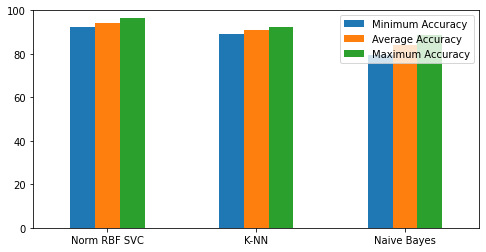

In [10]:
df = pd.DataFrame(
    {
        "Minimum Accuracy": minimum_accuracy,
        "Average Accuracy": average_accuracy,
        "Maximum Accuracy": maximum_accuracy,
    },
    index=index
)

ax = df.plot.bar(rot=0, figsize=(8, 4))
ax.set_ylim(0, 100)


Clearly, the SVM classifier outstands all the classifiers in terms of accuracy (obsiously at the cost of a higher execution time).